# 12.4 基尼系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF58D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

## 12.4.1 以基尼系数的标准使用决策树

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


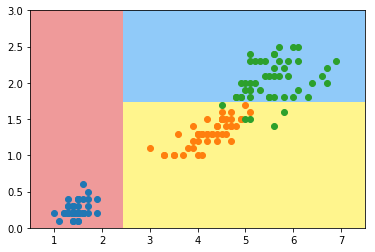

In [5]:
plot_decision_boundary(dt_clf, axis=[0.5,7.5, 0,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 12.4.2 模拟使用基尼系数进行划分

In [6]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    
    return res

def try_split(X, y):
    # 初始的基尼系数从无穷大开始
    best_gini = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        # 每次是找相邻的两个数据点，在d维度上中间的值是多少
        # 因此是从1开始，而不是0
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = gini(y_l) + gini(y_r)
                
                if e < best_gini:
                    best_gini, best_d, best_v = e, d, v
                    
    return best_gini, best_d, best_v

In [7]:
best_gini, best_d, best_v = try_split(X, y)
print("best_gini=", best_gini)
print("best_d", best_d)
print("best_v", best_v)

best_gini= 0.5
best_d 0
best_v 2.45


In [8]:
 X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [9]:
gini(y1_l)

0.0

In [10]:
gini(y1_r)

0.5

In [11]:
best_gini2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_gini=", best_gini2)
print("best_d", best_d2)
print("best_v", best_v2)

best_gini= 0.2105714900645938
best_d 1
best_v 1.75


In [12]:
 X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [13]:
gini(y2_l)

0.1680384087791495

In [14]:
gini(y2_r)

0.04253308128544431